<a href="https://colab.research.google.com/github/EmilSkaaning/DeepStruc/blob/main/DeepStruc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DeepStruc
**Github:** https://github.com/EmilSkaaning/DeepStruc

**Paper:** DeepStruc: Towards structure solution from pair distribution function data using deep generative models

**Questions:** andy@chem.ku.dk or etsk@chem.ku.dk

Welcome to DeepStruc that is a Deep Generative Model (DGM) which learns the relation between PDF and atomic structure and thereby solve a structure based on a PDF!

This script guides you through a simple example of how to use DeepStruc to predict a structure on a given PDF.

Aftwerwards, you can upload a PDF and use DeepStruc to predict the structure.

# First install requirements for DeepStruc (this step takes 5 - 10 minutes)

In [1]:
%%capture
!git clone https://github.com/EmilSkaaning/DeepStruc
!pip install pytorch_lightning torch-geometric==1.7.2 torch-scatter
!pip install torch-sparse==0.6.13 -f https://pytorch-geometric.com/whl/torch-1.10.0+cu113.html
!pip install matplotlib==3.4.3 ase nglview ipywidgets
from google.colab import output, files
from ase.io import read
from ase.visualize import view
from IPython.display import Image
import shutil
import os
os.chdir("DeepStruc")


# Example of how to use DeepStruc on a simulated dataset

We here provide an example of how to use DeepStruc on simulated data. The script can both take a single PDF or a directory of PDFs as input.

Be aware that the PDF(s) will be made to have an r-range between 2 - 30 Å in steps of 0.01 Å (2800 points PDF). Any data outside this range will not be used. Check the dataformat of our datasets (often made with PDFGui) if in doubt.


In [2]:
PDFFile = "/data/PDFs_simulated/FCC_h_3_k_6_l_7.gr" # Path to PDF(s).
Nstructures = 10 # Number of samples/structures generated for each unique PDF
structure = 3 # Which of the Nstructures to visualize. (Goes from 0 to Nstructures - 1) 
sigma = 3 # Sample to '-s' sigma in the normal distribution
plot = True # Plots sampled structures on top of DeepStruc training data.

**Outcomment the following line to use DeepStruc on experimental PDF(s) from your local computer.** <br>
Some browsers do not support this upload option. Use Google Chrome or simply upload the file manually in the left menu in the DeepStruc-main' folder.

In [ ]:
#PDFFile = list(files.upload())[0] # Upload PDF(s) from local computer

## Predict with DeepStruc

In [8]:
# Use DeepStruc on the uploaded PDF(s)
!python predict.py -d $PDFFile -n $Nstructures -s $sigma -p $plot -i $structure

# Get the latest results
all_subdirs = [d for d in os.listdir('.') if os.path.isdir(d)]
latest_subdir = max(all_subdirs, key=os.path.getmtime)

# Plot the latent space
#Image(latest_subdir + '/PDFs.png', width = 480, height = 360)

**The raw input PDF and the normalised PDF.** The raw input PDF is normalised to have the highest peak at G(r) = 1 and to be in between r = 2 Å and 30 Å.

## Visualization of the two-dimensional latent space (compressed feature space of the structures)

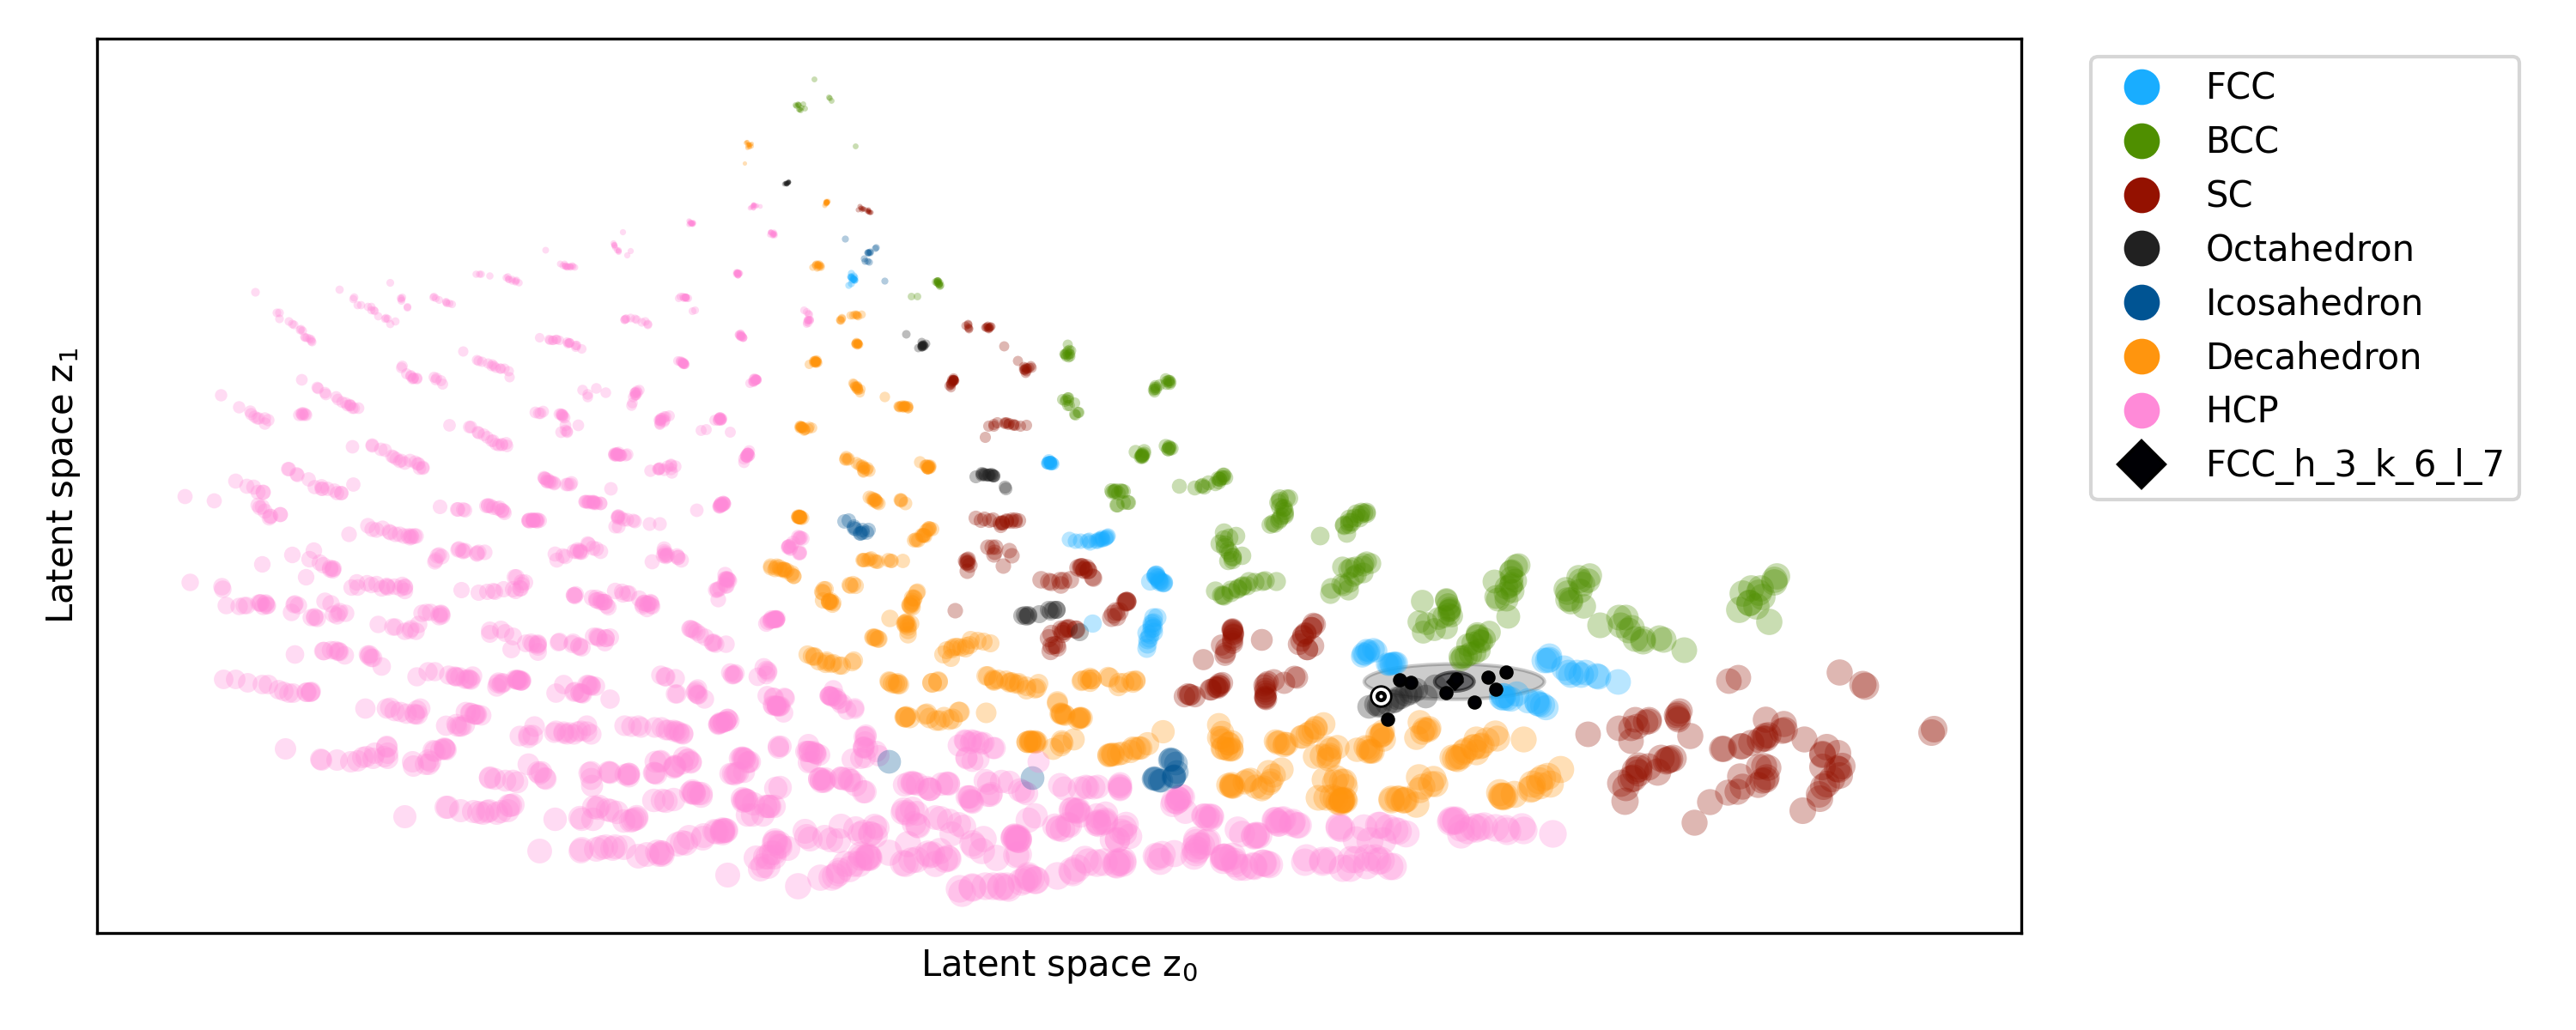

In [ ]:
# Plot the latent space
Image(latest_subdir + '/ls.png', width = 900, height = 360)

**The two-dimensional latent space with location of the input.** The size of the points relates to the size of the embedded structure. Each point is coloured after its structure type, FCC (light blue), octahedral (dark grey), decahedral (orange), BCC (green), icosahedral (dark blue), HCP (pink) and SC (red). Each point in the latent space corresponds to a structure based on its simulated PDF. Test data point are plotted on top of the training and validation data, which is made semi-transparent. The latent space locations of the reconstructed structures from the input are shown with black markers and the specific reconstructed structure that is shown in the next box is shown with a black and white marker.

## Visualization of a reconstructed structure 

In [ ]:
# Get folder of structures
subfolder = [f.path for f in os.scandir(latest_subdir) if f.is_dir()]

# Define which structure to plot and plot it
output.enable_custom_widget_manager()
view(read(subfolder[0] + "/" + sorted(os.listdir(subfolder[0]))[structure]) , viewer='ngl')

**The reconstructed structure from the input.** The reconstructed structure is indicated at the latent space above using a black and white marker.


**Be aware** that DeepStruc are only created to predict mono-metallic nanoparticles (MMNP) of up to 200 atoms. If the PDF file is not a MMNP, it is highly likely that DeepStruc will not output an meaningful structure.




## Download the latest results


In [ ]:
# Download the latest results
shutil.make_archive(latest_subdir, 'zip', latest_subdir)
files.download(latest_subdir + ".zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cite
If you use DeepStruc, please consider citing our paper. Thanks in advance!
```
@article{D2DD00086E,
title={DeepStruc: Towards structure solution from pair distribution function data using deep generative models},
author={Emil T. S. Kjær, Andy S. Anker, Marcus N. Weng, Simon J. L. Billinge, Raghavendra Selvan, Kirsten M. Ø. Jensen},
journal={Digital Discovery},
year={2022}}
```

# LICENSE
This project is licensed under the Apache License Version 2.0, January 2004 - see the LICENSE file at https://github.com/EmilSkaaning/DeepStruc/blob/main/LICENSE.md for details.